In [2]:
###数据读取与初探
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm, trange
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.inspection import permutation_importance
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import pandas as pd

# 确定当前工作目录
import os
print(os.getcwd())

/Users/zhuqingting/ML notes


In [4]:
import pandas as pd

# 读取 "listing2.csv" 文件，使用绝对路径，并在路径中包含空格的文件名使用原始字符串处理
listings_file_path = r'/Users/zhuqingting/ML notes/listings 2.csv'
airbnb_listings = pd.read_csv(listings_file_path)

# 读取 "calendar2.csv" 文件，使用绝对路径，并在路径中包含空格的文件名使用原始字符串处理
calendar_file_path = r'/Users/zhuqingting/ML notes/calendar.csv'
airbnb_calendar = pd.read_csv(calendar_file_path)

# 读取 "reviews2.csv" 文件，使用绝对路径，并在路径中包含空格的文件名使用原始字符串处理
reviews_file_path = r'/Users/zhuqingting/ML notes/reviews 2.csv'
airbnb_reviews = pd.read_csv(reviews_file_path)

# 现在你可以使用 airbnb_listings、airbnb_calendar 和 airbnb_reviews 来处理数据了


In [5]:
airbnb_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,51351068,https://www.airbnb.com/rooms/51351068,20230624004931,2023-06-24,previous scrape,Rental unit in Hong Kong · 2 bedrooms · 2 beds...,Flat is very quiet. A/C in each room and livin...,NaN,https://a0.muscache.com/pictures/bfab4a37-9a96...,125138858,https://www.airbnb.com/users/show/125138858,Tony,2017-04-10,Hong Kong,"29 yo professional. Grew up in France, studied...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/4ef59...,https://a0.muscache.com/im/pictures/user/4ef59...,Wan Chai,2,2,"['email', 'phone', 'work_email']",t,f,NaN,Wan Chai,NaN,22.28000,114.18490,Entire rental unit,Entire home/apt,2,NaN,1.5 baths,2.0,2.0,"[""Wifi"", ""Kitchen"", ""Washer"", ""Air conditionin...",$470.00,30,43,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,f,0,0,0,0,2023-06-24,1,0,0,2021-10-11,2021-10-11,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,1,0,0,0.05
1,51995972,https://www.airbnb.com/rooms/51995972,20230624004931,2023-06-24,previous scrape,Condo in Tung Wan Beach · Studio · 1 bath,我的旅居面東灣沙灘,NaN,https://a0.muscache.com/pictures/6c99c84e-656e...,109310747,https://www.airbnb.com/users/show/109310747,Brenda,2017-01-01,"New Territories, Hong Kong",本人在長洲提供各種房間，讓所有旅客能以合理價錢享受旅遊樂趣。住上一到二天來個短途旅行輕鬆一下...,within an hour,96%,80%,f,https://a0.muscache.com/im/pictures/user/734ad...,https://a0.muscache.com/im/pictures/user/734ad...,Cheung Chau,36,42,"['email', 'phone']",t,t,NaN,Islands,NaN,22.21112,114.02801,Entire condo,Entire home/apt,2,NaN,1 bath,NaN,NaN,"[""Wifi"", ""Essentials"", ""Hair dryer"", ""TV"", ""Sh...",$430.00,1,2,1.0,1.0,2.0,2.0,1.0,2.0,NaN,t,0,0,0,0,2023-06-24,2,1,0,2022-02-14,2022-12-03,2.00,3.00,2.50,2.50,2.50,4.50,4.00,NaN,f,35,35,0,0,0.12
2,4139784,https://www.airbnb.com/rooms/4139784,20230624004931,2023-06-24,city scrape,Home in Sha Tin District · ★4.79 · 1 bedroom ·...,oOo EARTH Room only oOo<br /><br />Set in Shat...,- Pai Tau Village is a nature oriented environ...,https://a0.muscache.com/pictures/65637917/0085...,15586744,https://www.airbnb.com/users/show/15586744,Sven,2014-05-16,Hong Kong,Hello everyone and an advance welcome to Hong ...,within an hour,100%,89%,NaN,https://a0.muscache.com/im/pictures/user/d0c43...,https://a0.muscache.com/im/pictures/user/d0c43...,NaN,15,17,"['email', 'phone']",t,t,"Sha Tin District, New Territories, Hong Kong",Sha Tin,NaN,22.38396,114.18642,Private room in home,Private room,1,NaN,1 shared bath,NaN,1.0,"[""Electric stove"", ""Microwave"", ""Essentials"", ...",$500.00,28,365,28.0,28.0,365.0,365.0,28.0,365.0,NaN,t,30,60,90,365,2023-06-24,15,1,0,2014-11-22,2023-03-31,4.79,4.93,4.86,4.86,4.93,4.79,4.86,NaN,f,15,4,11,0,0.14
3,9397325,https://www.airbnb.com/rooms/9397325,20230624004931,2023-06-24,city

In [6]:
airbnb_listings.shape

(6481, 75)

In [7]:
airbnb_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [8]:
airbnb_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,17891,2023-06-24,f,"$1,400.00","$1,400.00",60,365
1,17891,2023-06-25,f,"$1,400.00","$1,400.00",60,365
2,17891,2023-06-26,f,"$1,400.00","$1,400.00",60,365
3,17891,2023-06-27,f,"$1,400.00","$1,400.00",60,365
4,17891,2023-06-28,f,"$1,400.00","$1,400.00",60,365


In [9]:
airbnb_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,17891,37352,2010-04-23,76132,Tamara,The apartment on Holly wood Rd was exactly as ...
1,17891,56688,2010-06-24,97136,Wendy,"Apartment was perfect - stylish, spacious and..."
2,17891,76243,2010-08-09,163312,Angela,We loved staying here for the weekend. The apa...
3,17891,93590,2010-09-09,148333,Jennifer,An awesome loft that looks just like it does i...
4,17891,108082,2010-09-29,218702,Matt,"Candace was great, she prepared the loft with ..."


In [10]:
###数据清洗
# 删除url字段
def drop_function(df):
    df = df.drop(columns=['listing_url', 'description', 'host_thumbnail_url', 'host_picture_url', 'latitude', 'longitude', 'picture_url', 'host_url', 'host_location', 'neighbourhood', 'neighbourhood_cleansed', 'host_about', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped'])
    return df
airbnb_df = drop_function(airbnb_listings)

In [11]:
print(airbnb_df.head())

         id       scrape_id last_scraped           source  \
0  51351068  20230624004931   2023-06-24  previous scrape   
1  51995972  20230624004931   2023-06-24  previous scrape   
2   4139784  20230624004931   2023-06-24      city scrape   
3   9397325  20230624004931   2023-06-24      city scrape   
4   5159313  20230624004931   2023-06-24      city scrape   

                                                name  \
0  Rental unit in Hong Kong · 2 bedrooms · 2 beds...   
1          Condo in Tung Wan Beach · Studio · 1 bath   
2  Home in Sha Tin District · ★4.79 · 1 bedroom ·...   
3  Rental unit in Hong Kong · ★4.56 · 1 bedroom ·...   
4  Place to stay in 香港 · ★4.64 · 1 bedroom · 10 b...   

                               neighborhood_overview    host_id host_name  \
0                                                NaN  125138858      Tony   
1                                                NaN  109310747    Brenda   
2  - Pai Tau Village is a nature oriented environ...   15586744  

In [12]:
airbnb_df.head()

,id,scrape_id,last_scraped,source,name,neighborhood_overview,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,51351068,20230624004931,2023-06-24,previous scrape,Rental unit in Hong Kong · 2 bedrooms · 2 beds...,NaN,125138858,Tony,2017-04-10,NaN,NaN,NaN,f,Wan Chai,2,2,"['email', 'phone', 'work_email']",t,f,NaN,Entire rental unit,Entire home/apt,2,NaN,1.5 baths,2.0,2.0,"[""Wifi"", ""Kitchen"", ""Washer"", ""Air conditionin...",$470.00,30,43,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,1,0,0,2021-10-11,2021-10-11,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,1,0,0,0.05
1,51995972,20230624004931,2023-06-24,previous scrape,Condo in Tung Wan Beach · Studio · 1 bath,NaN,109310747,Brenda,2017-01-01,within an hour,96%,80%,f,Cheung Chau,36,42,"['email', 'phone']",t,t,NaN,Entire condo,Entire home/apt,2,NaN,1 bath,NaN,NaN,"[""Wifi"", ""Essentials"", ""Hair dryer"", ""TV"", ""Sh...",$430.00,1,2,1.0,1.0,2.0,2.0,1.0,2.0,NaN,2,1,0,2022-02-14,2022-12-03,2.00,3.00,2.50,2.50,2.50,4.50,4.00,NaN,f,35,35,0,0,0.12
2,4139784,20230624004931,2023-06-24,city scrape,Home in Sha Tin District · ★4.79 · 1 bedroom ·...,- Pai Tau Village is a nature oriented environ...,15586744,Sven,2014-05-16,within an hour,100%,89%,NaN,NaN,15,17,"['email', 'phone']",t,t,NaN,Private room in home,Private room,1,NaN,1 shared bath,NaN,1.0,"[""Electric stove"", ""Microwave"", ""Essentials"", ...",$500.00,28,365,28.0,28.0,365.0,365.0,28.0,365.0,NaN,15,1,0,2014-11-22,2023-03-31,4.79,4.93,4.86,4.86,4.93,4.79,4.86,NaN,f,15,4,11,0,0.14
3,9397325,20230624004931,2023-06-24,city scrape,Rental unit in Hong Kong · ★4.56 · 1 bedroom ·...,NaN,48735502,Ocean,2015-11-11,within an hour,100%,97%,f,Jordan,3,3,"['email', 'phone']",t,t,NaN,Private room in rental unit,Private room,2,NaN,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Wifi"", ""Heating"", ""TV"",...",$367.00,1,1125,1.0,1.0,31.0,1125.0,1.0,635.1,NaN,9,6,0,2016-05-02,2023-05-02,4.56,4.56,4.44,4.78,4.56,5.00,4.56,NaN,t,3,0,3,0,0.10
4,5159313,20230624004931,2023-06-24,city scrape,Place to stay in 香港 · ★4.64 · 1 bedroom · 10 b...,NaN,23376488,Pan,2014-11-05,within a few hours,97%,81%,f,Mong Kok,8,12,"['email', 'phone']",t,t,NaN,Shared room,Shared room,10,NaN,2 shared baths,NaN,10.0,"[""Fire extinguisher"", ""Essentials"", ""Wifi"", ""T...",$170.00,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,58,0,0,2015-04-23,2019-07-07,4.64,4.74,4.81,4.64,4.62,4.86,4.66,NaN,f,8,0,0,8,0.58


In [13]:
# 查看缺失值百分比
(airbnb_df.isnull().sum()/airbnb_df.shape[0])* 100

id                                                0.000000
scrape_id                                         0.000000
last_scraped                                      0.000000
source                                            0.000000
name                                              0.000000
neighborhood_overview                            68.847400
host_id                                           0.000000
host_name                                         0.000000
host_since                                        0.000000
host_response_time                               13.701589
host_response_rate                               13.701589
host_acceptance_rate                             13.840457
host_is_superhost                                51.890140
host_neighbourhood                                6.866224
host_listings_count                               0.000000
host_total_listings_count                         0.000000
host_verifications                                0.0000

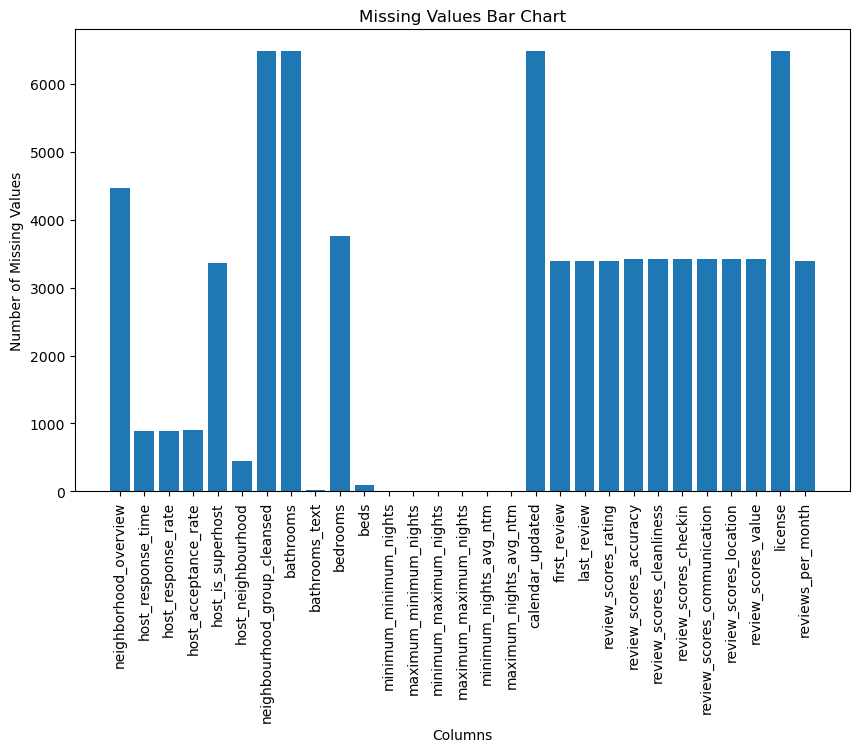

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 计算每个列的缺失值数量
missing_values_count = airbnb_df.isnull().sum()

# 创建一个包含缺失值数量的 DataFrame
missing_values_df = pd.DataFrame(missing_values_count, columns=['Missing Values'])

# 保留有缺失值的列
missing_values_df = missing_values_df[missing_values_df['Missing Values'] > 0]

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.bar(missing_values_df.index, missing_values_df['Missing Values'])
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values Bar Chart')
plt.xticks(rotation=90)  # 使x轴标签竖向显示，以防标签过长重叠
plt.show()


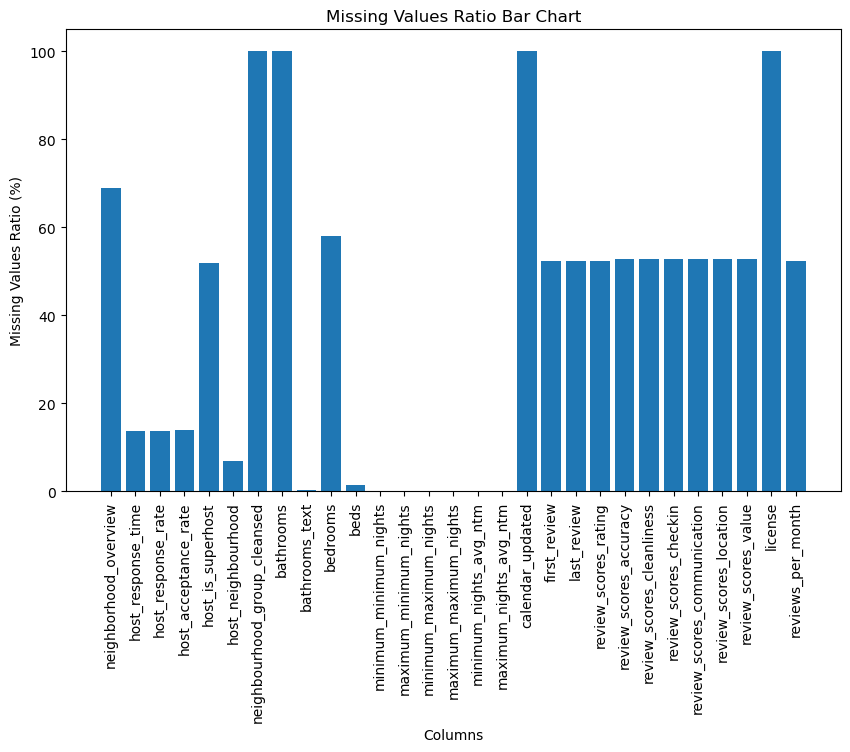

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 计算每个列的缺失值数量
missing_values_count = airbnb_df.isnull().sum()

# 计算每个列的总数据量
total_values_count = len(airbnb_df)

# 计算每个列的缺失值比例
missing_values_ratio = (missing_values_count / total_values_count) * 100

# 创建一个包含缺失值比例的 DataFrame
missing_values_df = pd.DataFrame(missing_values_ratio, columns=['Missing Values Ratio'])

# 保留有缺失值的列
missing_values_df = missing_values_df[missing_values_df['Missing Values Ratio'] > 0]

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.bar(missing_values_df.index, missing_values_df['Missing Values Ratio'])
plt.xlabel('Columns')
plt.ylabel('Missing Values Ratio (%)')
plt.title('Missing Values Ratio Bar Chart')
plt.xticks(rotation=90)  # 使x轴标签竖向显示，以防标签过长重叠
plt.show()


In [16]:
# 剔除高缺失比例字段
def drop_function_2(df):
    df = df.drop(columns=['neighborhood_overview', 'host_is_superhost', 'neighbourhood_group_cleansed', 'bathrooms', 'bedrooms','calendar_updated','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','license','reviews_per_month'])
    return df
airbnb_df = drop_function_2(airbnb_df)

In [17]:
airbnb_df.head()

,id,scrape_id,last_scraped,source,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms_text,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,51351068,20230624004931,2023-06-24,previous scrape,Rental unit in Hong Kong · 2 bedrooms · 2 beds...,125138858,Tony,2017-04-10,NaN,NaN,NaN,Wan Chai,2,2,"['email', 'phone', 'work_email']",t,f,Entire rental unit,Entire home/apt,2,1.5 baths,2.0,"[""Wifi"", ""Kitchen"", ""Washer"", ""Air conditionin...",$470.00,30,43,30.0,30.0,1125.0,1125.0,30.0,1125.0,1,0,0,f,1,1,0,0
1,51995972,20230624004931,2023-06-24,previous scrape,Condo in Tung Wan Beach · Studio · 1 bath,109310747,Brenda,2017-01-01,within an hour,96%,80%,Cheung Chau,36,42,"['email', 'phone']",t,t,Entire condo,Entire home/apt,2,1 bath,NaN,"[""Wifi"", ""Essentials"", ""Hair dryer"", ""TV"", ""Sh...",$430.00,1,2,1.0,1.0,2.0,2.0,1.0,2.0,2,1,0,f,35,35,0,0
2,4139784,20230624004931,2023-06-24,city scrape,Home in Sha Tin District · ★4.79 · 1 bedroom ·...,15586744,Sven,2014-05-16,within an hour,100%,89%,NaN,15,17,"['email', 'phone']",t,t,Private room in home,Private room,1,1 shared bath,1.0,"[""Electric stove"", ""Microwave"", ""Essentials"", ...",$500.00,28,365,28.0,28.0,365.0,365.0,28.0,365.0,15,1,0,f,15,4,11,0
3,9397325,20230624004931,2023-06-24,city scrape,Rental unit in Hong Kong · ★4.56 · 1 bedroom ·...,48735502,Ocean,2015-11-11,within an hour,100%,97%,Jordan,3,3,"['email', 'phone']",t,t,Private room in rental unit,Private room,2,1 bath,1.0,"[""Fire extinguisher"", ""Wifi"", ""Heating"", ""TV"",...",$367.00,1,1125,1.0,1.0,31.0,1125.0,1.0,635.1,9,6,0,t,3,0,3,0
4,5159313,20230624004931,2023-06-24,city scrape,Place to stay in 香港 · ★4.64 · 1 bedroom · 10 b...,23376488,Pan,2014-11-05,within a few hours,97%,81%,Mong Kok,8,12,"['email', 'phone']",t,t,Shared room,Shared room,10,2 shared baths,10.0,"[""Fire extinguisher"", ""Essentials"", ""Wifi"", ""T...",$170.00,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,58,0,0,f,8,0,0,8


In [18]:
airbnb_df.shape

(6481, 40)

In [19]:
#均值填充
def input_mean(df, column_list):
    for column in column_list:
        # Convert the column to numeric (float) type before calculating the mean and filling missing values
        df[column] = pd.to_numeric(df[column], errors='coerce')
        df[column].fillna(value=df[column].mean(), inplace=True)
    return df

column_list = ['host_response_rate', 'host_acceptance_rate', 'beds',
               'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
               'maximum_maximum_nights', 'minimum_nights_avg_ntm',
               'maximum_nights_avg_ntm']
airbnb_df = input_mean(airbnb_df, column_list)


In [20]:
# 众数填充
def input_mode(df, column_list):    
    for columns in column_list:        
        df[columns].fillna(value = df[columns].mode()[0], inplace=True)
    return df
column_list = ['host_response_time', 'host_neighbourhood', 'bathrooms_text']
airbnb_df = input_mode(airbnb_df, column_list)

In [21]:
#再查看一遍是否有缺失值
# 查看缺失值百分比
(airbnb_df.isnull().sum()/airbnb_df.shape[0])* 100

id                                                0.0
scrape_id                                         0.0
last_scraped                                      0.0
source                                            0.0
name                                              0.0
host_id                                           0.0
host_name                                         0.0
host_since                                        0.0
host_response_time                                0.0
host_response_rate                              100.0
host_acceptance_rate                            100.0
host_neighbourhood                                0.0
host_listings_count                               0.0
host_total_listings_count                         0.0
host_verifications                                0.0
host_has_profile_pic                              0.0
host_identity_verified                            0.0
property_type                                     0.0
room_type                   

In [22]:
# 剔除遗漏的高缺失比例字段
def drop_function_2(df):
    # Remove the extra space in column names
    df.columns = df.columns.str.strip()
    # Drop the specified columns
    df = df.drop(columns=['host_response_rate', 'host_acceptance_rate'])
    return df

airbnb_df = drop_function_2(airbnb_df)


In [23]:
(airbnb_df.isnull().sum()/airbnb_df.shape[0])* 100
#perfect

id                                              0.0
scrape_id                                       0.0
last_scraped                                    0.0
source                                          0.0
name                                            0.0
host_id                                         0.0
host_name                                       0.0
host_since                                      0.0
host_response_time                              0.0
host_neighbourhood                              0.0
host_listings_count                             0.0
host_total_listings_count                       0.0
host_verifications                              0.0
host_has_profile_pic                            0.0
host_identity_verified                          0.0
property_type                                   0.0
room_type                                       0.0
accommodates                                    0.0
bathrooms_text                                  0.0
beds        

In [24]:
airbnb_df = airbnb_df.replace({'host_has_profile_pic': 't', 'host_identity_verified': 't', 'instant_bookable': 't'}, 1)
airbnb_df = airbnb_df.replace({'host_has_profile_pic': 'f', 'host_identity_verified': 'f', 'instant_bookable': 'f'}, 0)

In [25]:
def string_to_int(df, column):
    # 检查列的数据类型是否为字符串
    if df[column].dtype == 'object':
        # 字符串替换清理
        df[column] = df[column].str.replace("$", "")
        df[column] = df[column].str.replace(",", "")
        # 转为数值型
        df[column] = pd.to_numeric(df[column]).astype(int)
    return df

airbnb_df = string_to_int(airbnb_df, 'price')


/var/folders/8p/4zv9kl5910x98hpxqlfz9zcr0000gn/T/ipykernel_3957/4223183726.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column] = df[column].str.replace("$", "")


In [26]:
#查看price的格式有么有更改过来
airbnb_df.head()

,id,scrape_id,last_scraped,source,name,host_id,host_name,host_since,host_response_time,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms_text,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,51351068,20230624004931,2023-06-24,previous scrape,Rental unit in Hong Kong · 2 bedrooms · 2 beds...,125138858,Tony,2017-04-10,within a few hours,Wan Chai,2,2,"['email', 'phone', 'work_email']",1,0,Entire rental unit,Entire home/apt,2,1.5 baths,2.00000,"[""Wifi"", ""Kitchen"", ""Washer"", ""Air conditionin...",470,30,43,30.0,30.0,1125.0,1125.0,30.0,1125.0,1,0,0,0,1,1,0,0
1,51995972,20230624004931,2023-06-24,previous scrape,Condo in Tung Wan Beach · Studio · 1 bath,109310747,Brenda,2017-01-01,within an hour,Cheung Chau,36,42,"['email', 'phone']",1,1,Entire condo,Entire home/apt,2,1 bath,1.60144,"[""Wifi"", ""Essentials"", ""Hair dryer"", ""TV"", ""Sh...",430,1,2,1.0,1.0,2.0,2.0,1.0,2.0,2,1,0,0,35,35,0,0
2,4139784,20230624004931,2023-06-24,city scrape,Home in Sha Tin District · ★4.79 · 1 bedroom ·...,15586744,Sven,2014-05-16,within an hour,Mong Kok,15,17,"['email', 'phone']",1,1,Private room in home,Private room,1,1 shared bath,1.00000,"[""Electric stove"", ""Microwave"", ""Essentials"", ...",500,28,365,28.0,28.0,365.0,365.0,28.0,365.0,15,1,0,0,15,4,11,0
3,9397325,20230624004931,2023-06-24,city scrape,Rental unit in Hong Kong · ★4.56 · 1 bedroom ·...,48735502,Ocean,2015-11-11,within an hour,Jordan,3,3,"['email', 'phone']",1,1,Private room in rental unit,Private room,2,1 bath,1.00000,"[""Fire extinguisher"", ""Wifi"", ""Heating"", ""TV"",...",367,1,1125,1.0,1.0,31.0,1125.0,1.0,635.1,9,6,0,1,3,0,3,0
4,5159313,20230624004931,2023-06-24,city scrape,Place to stay in 香港 · ★4.64 · 1 bedroom · 10 b...,23376488,Pan,2014-11-05,within a few hours,Mong Kok,8,12,"['email', 'phone']",1,1,Shared room,Shared room,10,2 shared baths,10.00000,"[""Fire extinguisher"", ""Essentials"", ""Wifi"", ""T...",170,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,58,0,0,0,8,0,0,8


In [27]:
# 查看列表型取值字段
airbnb_df_copy = airbnb_df.copy()
airbnb_df_copy['amenities'].head()
airbnb_df_copy['host_verifications'].head()

0    ['email', 'phone', 'work_email']
1                  ['email', 'phone']
2                  ['email', 'phone']
3                  ['email', 'phone']
4                  ['email', 'phone']
Name: host_verifications, dtype: object

In [28]:
# 确保正确定义 airbnb_df_copy 变量
airbnb_df_copy = airbnb_df.copy()

# 哑变量编码 amenities 列
airbnb_df_copy['amenities'] = airbnb_df_copy['amenities'].str.replace('"', '', regex=False)
airbnb_df_copy['amenities'] = airbnb_df_copy['amenities'].str.replace(']', "", regex=False)
airbnb_df_copy['amenities'] = airbnb_df_copy['amenities'].str.replace('[', "", regex=False)
df_amenities = airbnb_df_copy['amenities'].str.get_dummies(sep=",")

# 哑变量编码 host_verifications 列
airbnb_df_copy['host_verifications'] = airbnb_df_copy['host_verifications'].str.replace(']', "", regex=False)
airbnb_df_copy['host_verifications'] = airbnb_df_copy['host_verifications'].str.replace('[', "", regex=False)
airbnb_host_ver = airbnb_df_copy['host_verifications'].str.get_dummies(sep=",")

# 显示结果
df_amenities.head()
airbnb_host_ver.head()

,'phone','work_email','email','phone'
0,1,1,1,0
1,1,0,1,0
2,1,0,1,0
3,1,0,1,0
4,1,0,1,0


In [29]:
df_amenities.head()

,100\ TV with Chromecast,140\ HDTV,19\ TV with standard cable,2 Burner stainless steel gas stove,2-5 years old,20\ TV,21\ HDTV with standard cable,21\ TV,22\ HDTV,22\ TV,23\ TV with standard cable,24\ HDTV,24\ HDTV with standard cable,24\ TV with standard cable,27\ HDTV with Netflix,29\ TV,30\ HDTV with standard cable,32\ HDTV,32\ HDTV with Amazon Prime Video,32\ HDTV with Apple TV,32\ HDTV with Chromecast,32\ HDTV with Disney+,32\ HDTV with Netflix,32\ HDTV with standard cable,32\ TV,33\ TV with Chromecast,38\ HDTV with Apple TV,4 gas stainless steel stove,40\ HDTV,40\ HDTV with Apple TV,40\ HDTV with Chromecast,40\ HDTV with Netflix,40\ HDTV with standard cable,40\ TV,40\ TV with Disney+,42\ HDTV,42\ HDTV with Apple TV,42\ HDTV with Disney+,42\ HDTV with HBO Max,42\ HDTV with Netflix,42\ HDTV with standard cable,43\ HDTV,43\ HDTV with Amazon Prime Video,43\ HDTV with Apple TV,43\ HDTV with Chromecast,43\ HDTV with Disney+,43\ HDTV with Netflix,43\ HDTV with standard cable,43\ TV with Amazon Prime Video,43\ TV with Netflix,43\ TV with standard cable,44\ HDTV with Amazon Prime Video,44\ HDTV with premium cable,45\ HDTV with Amazon Prime Video,45\ HDTV with Apple TV,45\ HDTV with Netflix,45\ TV with Netflix,46\ HDTV with Netflix,46\ HDTV with premium cable,46\ TV,46\ TV with standard cable,47\ HDTV with Netflix,48\ HDTV with Netflix,48\ TV with Amazon Prime Video,48\ TV with Netflix,49\ HDTV,49\ HDTV with Disney+,49\ HDTV with Netflix,49\ HDTV with standard cable,49\ TV with Amazon Prime Video,5-10 years old,5.1 Surround Sound Bluetooth sound system,50\ HDTV,50\ HDTV with Apple TV,50\ HDTV with Chromecast,50\ HDTV with DVD player,50\ HDTV with Disney+,50\ HDTV with Netflix,50\ HDTV with premium cable,50\ HDTV with standard cable,50\ TV,50\ TV with Chromecast,50\ TV with Netflix,52\ HDTV with Apple TV,52\ HDTV with Netflix,52\ TV,54\ TV with premium cable,54\ TV with standard cable,55\ HDTV,55\ HDTV with Amazon Prime Video,55\ HDTV with Apple TV,55\ HDTV with Chromecast,55\ HDTV with HBO Max,55\ HDTV with Netflix,55\ HDTV with premium cable,55\ HDTV with standard cable,55\ TV with Disney+,55\ TV with Netflix,56\ HDTV,56\ HDTV with Amazon Prime Video,60\ HDTV with Disney+,62\ HDTV with Netflix,65\ HDTV,65\ HDTV with Amazon Prime Video,65\ HDTV with Apple TV,65\ HDTV with Chromecast,65\ HDTV with DVD player,65\ HDTV with Disney+,65\ HDTV with Fire TV,65\ HDTV with HBO Max,65\ HDTV with Netflix,65\ TV,70\ HDTV with Disney+,70\ HDTV with standard cable,70\ TV with Disney+,75\ HDTV,75\ HDTV with Amazon Prime Video,77\ HDTV with standard cable,A brand new shampoo and conditioner will be provided for stay with 30 days and more. shampoo,AC - split type ductless system,AEG induction stove,AEG stainless steel induction stove,AESOP,AESOP shampoo,Aesop body soap,Aesop body soap,Aesop conditioner,Aesop shampoo,Aesop/Dove body soap,Aesop/Dove conditioner,Air Fryer oven,Air conditioning,Amazon Prime Video,Apple Bluetooth sound system,Apple Inn shampoo,Apple TV,Aromatica anti-hair loss vegan shampoo shampoo,Asprey etc body soap,Avalon conditioner,Avalon shampoo,Aveda body soap,Aveda conditioner,Aveeno body soap,Aveeno body soap,Avene body soap,B&O Bluetooth sound system,B&O Bluetooth sound system,B&O sound system with Bluetooth and aux,B&O sound system with aux,BALMAIN body soap,BBQ grill,BBQ grill: charcoal,BBQ grill: gas,BOSE sound system with Bluetooth and aux,BOSE sound system with aux,Baby bath,Baby bath - always at the listing,Baby bath - available upon request,Baby monitor,Baby monitor - always at the listing,Baby safety gates,Babysitter recommendations,Backyard,Baking sheet,Barbecue utensils,Basic shampoo,Basic body soap,Bathrobes,Bathtub,Baumatic stainless steel oven,Bay view,Beach access,Beach access \u2013 Beachfront,Beach essentials,Beach view,Bed Head TIGI shampoo,Bed linens,Bed sheets and pillows,Bidet,Bikes,Blender,Bluetooth sound system,Bluetooth speaker,Bluetooth speaker sound system with Bluetooth and aux,Board games,Boat slip

In [30]:
# 删除原始字段
airbnb_df = airbnb_df.drop(['host_verifications', 'amenities'], axis=1)

In [31]:
airbnb_df.head()

,id,scrape_id,last_scraped,source,name,host_id,host_name,host_since,host_response_time,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,51351068,20230624004931,2023-06-24,previous scrape,Rental unit in Hong Kong · 2 bedrooms · 2 beds...,125138858,Tony,2017-04-10,within a few hours,Wan Chai,2,2,1,0,Entire rental unit,Entire home/apt,2,1.5 baths,2.00000,470,30,43,30.0,30.0,1125.0,1125.0,30.0,1125.0,1,0,0,0,1,1,0,0
1,51995972,20230624004931,2023-06-24,previous scrape,Condo in Tung Wan Beach · Studio · 1 bath,109310747,Brenda,2017-01-01,within an hour,Cheung Chau,36,42,1,1,Entire condo,Entire home/apt,2,1 bath,1.60144,430,1,2,1.0,1.0,2.0,2.0,1.0,2.0,2,1,0,0,35,35,0,0
2,4139784,20230624004931,2023-06-24,city scrape,Home in Sha Tin District · ★4.79 · 1 bedroom ·...,15586744,Sven,2014-05-16,within an hour,Mong Kok,15,17,1,1,Private room in home,Private room,1,1 shared bath,1.00000,500,28,365,28.0,28.0,365.0,365.0,28.0,365.0,15,1,0,0,15,4,11,0
3,9397325,20230624004931,2023-06-24,city scrape,Rental unit in Hong Kong · ★4.56 · 1 bedroom ·...,48735502,Ocean,2015-11-11,within an hour,Jordan,3,3,1,1,Private room in rental unit,Private room,2,1 bath,1.00000,367,1,1125,1.0,1.0,31.0,1125.0,1.0,635.1,9,6,0,1,3,0,3,0
4,5159313,20230624004931,2023-06-24,city scrape,Place to stay in 香港 · ★4.64 · 1 bedroom · 10 b...,23376488,Pan,2014-11-05,within a few hours,Mong Kok,8,12,1,1,Shared room,Shared room,10,2 shared baths,10.00000,170,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,58,0,0,0,8,0,0,8


In [32]:
airbnb_df['price'].mean(), airbnb_df['price'].min(), airbnb_df['price'].max(),airbnb_df['price'].median()

(800.8318160777658, 0, 150000, 400.0)

In [33]:
# 持有房源最多的房东
host_df = pd.DataFrame(airbnb_df['host_name'].value_counts()/airbnb_df['host_name'].count() *100).reset_index()
host_df = host_df.rename(columns={'index':'name', 'host_name':'perc_count'})
host_df.head(10)

,name,perc_count
0,Jov,11.232834
1,Ivy,6.326184
2,Jovee,5.631847
3,Choon San,4.675204
4,Apac,2.314458
5,Tane Residence,1.866996
6,Morgen,1.434964
7,Tushita,1.373245
8,Apple,1.218948
9,Debe,1.064651


In [34]:
host_df['perc_count'].loc[:10].sum()

38.18855114951396

In [35]:
airbnb_df['room_type'].value_counts()

Private room       3602
Entire home/apt    2494
Shared room         312
Hotel room           73
Name: room_type, dtype: int64

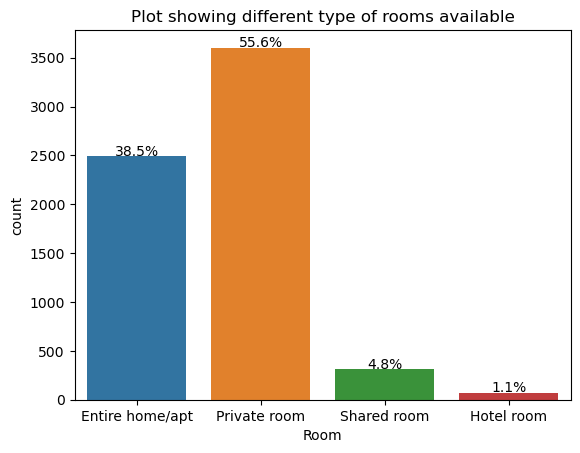

In [36]:
# 分布绘图
zx = sb.countplot(data=airbnb_df, x='room_type')
total = float(airbnb_df['room_type'].count())
for p in zx.patches:
    width = p.get_width()
    height = p.get_height()
    zx.text(p.get_x() + p.get_width()/2.,height+5, '{:1.1f}%'.format((height/total)*100), ha='center')
    zx.set_title('Plot showing different type of rooms available');
    plt.xlabel('Room')

In [37]:
airbnb_df.head()

,id,scrape_id,last_scraped,source,name,host_id,host_name,host_since,host_response_time,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,51351068,20230624004931,2023-06-24,previous scrape,Rental unit in Hong Kong · 2 bedrooms · 2 beds...,125138858,Tony,2017-04-10,within a few hours,Wan Chai,2,2,1,0,Entire rental unit,Entire home/apt,2,1.5 baths,2.00000,470,30,43,30.0,30.0,1125.0,1125.0,30.0,1125.0,1,0,0,0,1,1,0,0
1,51995972,20230624004931,2023-06-24,previous scrape,Condo in Tung Wan Beach · Studio · 1 bath,109310747,Brenda,2017-01-01,within an hour,Cheung Chau,36,42,1,1,Entire condo,Entire home/apt,2,1 bath,1.60144,430,1,2,1.0,1.0,2.0,2.0,1.0,2.0,2,1,0,0,35,35,0,0
2,4139784,20230624004931,2023-06-24,city scrape,Home in Sha Tin District · ★4.79 · 1 bedroom ·...,15586744,Sven,2014-05-16,within an hour,Mong Kok,15,17,1,1,Private room in home,Private room,1,1 shared bath,1.00000,500,28,365,28.0,28.0,365.0,365.0,28.0,365.0,15,1,0,0,15,4,11,0
3,9397325,20230624004931,2023-06-24,city scrape,Rental unit in Hong Kong · ★4.56 · 1 bedroom ·...,48735502,Ocean,2015-11-11,within an hour,Jordan,3,3,1,1,Private room in rental unit,Private room,2,1 bath,1.00000,367,1,1125,1.0,1.0,31.0,1125.0,1.0,635.1,9,6,0,1,3,0,3,0
4,5159313,20230624004931,2023-06-24,city scrape,Place to stay in 香港 · ★4.64 · 1 bedroom · 10 b...,23376488,Pan,2014-11-05,within a few hours,Mong Kok,8,12,1,1,Shared room,Shared room,10,2 shared baths,10.00000,170,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,58,0,0,0,8,0,0,8


In [38]:
# 删除'price_clusters'特征列
airbnb_df.drop('price_clusters', axis=1, inplace=True)


KeyError: "['price_clusters'] not found in axis"

In [39]:
airbnb_df.head()

,id,scrape_id,last_scraped,source,name,host_id,host_name,host_since,host_response_time,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,51351068,20230624004931,2023-06-24,previous scrape,Rental unit in Hong Kong · 2 bedrooms · 2 beds...,125138858,Tony,2017-04-10,within a few hours,Wan Chai,2,2,1,0,Entire rental unit,Entire home/apt,2,1.5 baths,2.00000,470,30,43,30.0,30.0,1125.0,1125.0,30.0,1125.0,1,0,0,0,1,1,0,0
1,51995972,20230624004931,2023-06-24,previous scrape,Condo in Tung Wan Beach · Studio · 1 bath,109310747,Brenda,2017-01-01,within an hour,Cheung Chau,36,42,1,1,Entire condo,Entire home/apt,2,1 bath,1.60144,430,1,2,1.0,1.0,2.0,2.0,1.0,2.0,2,1,0,0,35,35,0,0
2,4139784,20230624004931,2023-06-24,city scrape,Home in Sha Tin District · ★4.79 · 1 bedroom ·...,15586744,Sven,2014-05-16,within an hour,Mong Kok,15,17,1,1,Private room in home,Private room,1,1 shared bath,1.00000,500,28,365,28.0,28.0,365.0,365.0,28.0,365.0,15,1,0,0,15,4,11,0
3,9397325,20230624004931,2023-06-24,city scrape,Rental unit in Hong Kong · ★4.56 · 1 bedroom ·...,48735502,Ocean,2015-11-11,within an hour,Jordan,3,3,1,1,Private room in rental unit,Private room,2,1 bath,1.00000,367,1,1125,1.0,1.0,31.0,1125.0,1.0,635.1,9,6,0,1,3,0,3,0
4,5159313,20230624004931,2023-06-24,city scrape,Place to stay in 香港 · ★4.64 · 1 bedroom · 10 b...,23376488,Pan,2014-11-05,within a few hours,Mong Kok,8,12,1,1,Shared room,Shared room,10,2 shared baths,10.00000,170,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,58,0,0,0,8,0,0,8


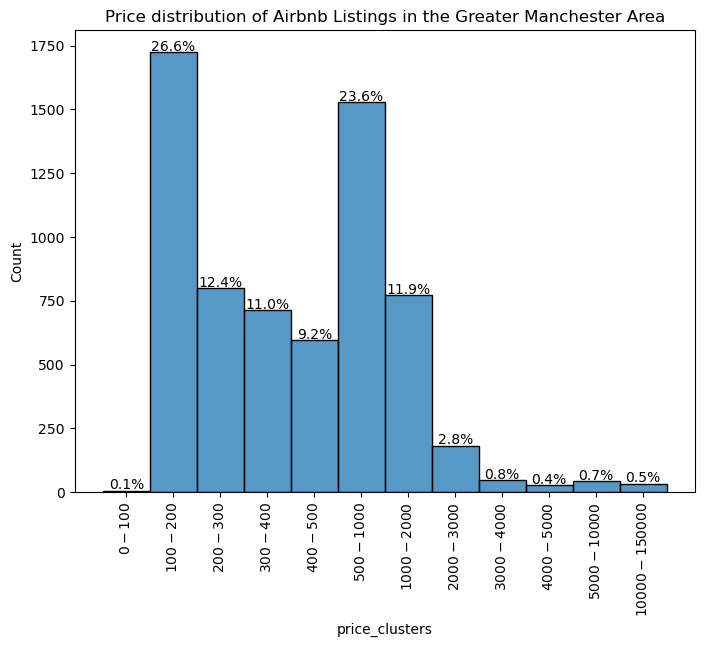

In [40]:
# 划分价格档位区间
labels = ['$0 - $100', '$100 - $200', '$200 - $300', '$300 - $400', '$400 - $500', '$500 - $1000', '$1000-$2000', '$2000-$3000', '$3000 - $4000', '$4000-$5000', '$5000-$10000', '$10000-$150000']
price_cuts = pd.cut(airbnb_df['price'], bins = [0, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000, 10000, 150000], right=True, labels= labels)
# 从价格档构建dataframe
price_clusters = pd.DataFrame(price_cuts).rename(columns={'price': 'price_clusters'})
# 拼接原始dataframe
airbnb_df = pd.concat([airbnb_df, price_clusters], axis=1)
# 分布绘图
def price_cluster_plot(df, column, title):    
    plt.figure(figsize=(8,6));
    yx = sb.histplot(data = df[column]);
    total = float(df[column].count())
    for p in yx.patches:
        width = p.get_width()
        height = p.get_height()
        yx.text(p.get_x() + p.get_width()/2.,height+5, '{:1.1f}%'.format((height/total)*100), ha='center')
    yx.set_title(title);
    plt.xticks(rotation=90)
    return yx
price_cluster_plot(airbnb_df, column='price_clusters', 
                   title='Price distribution of Airbnb Listings in the Greater Manchester Area');

In [41]:
# 基于评论量统计排序
ax = airbnb_df.groupby('property_type').agg(number_of_reviews=('number_of_reviews', 'max')).sort_values(
by='number_of_reviews', ascending=False).reset_index()
ax.head()

,property_type,number_of_reviews
0,Private room in rental unit,501
1,Entire rental unit,490
2,Entire condo,422
3,Entire serviced apartment,411
4,Entire home,358


Text(0, 0.5, 'Property Type')

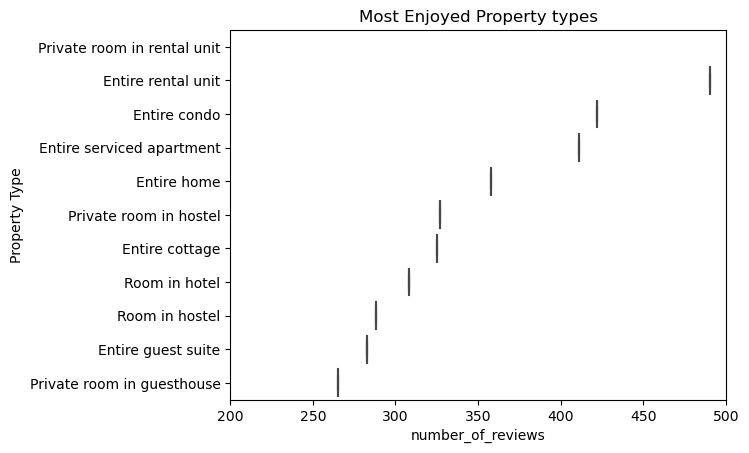

In [42]:
# 可视化
bx = ax.loc[:10]
bx =sb.boxplot(data =bx, x='number_of_reviews', y='property_type')
bx.set_xlim(200, 500)
plt.title('Most Enjoyed Property types');
plt.xlabel('number_of_reviews');
plt.ylabel('Property Type')

In [43]:
import pandas as pd

# 假设airbnb_df是你的DataFrame，包含了Airbnb的数据
# 你需要先确保导入了airbnb_df或者读取了正确的数据文件

# 使用describe()方法对DataFrame进行描述性统计
description = airbnb_df.describe()

print(description)



                 id     scrape_id       host_id  host_listings_count  \
count  6.481000e+03  6.481000e+03  6.481000e+03          6481.000000   
mean   2.705818e+17  2.023062e+13  1.438579e+08           134.463200   
std    3.835097e+17  1.968902e+00  1.644458e+08           175.952248   
min    1.789100e+04  2.023062e+13  6.303800e+04             1.000000   
25%    2.514438e+07  2.023062e+13  1.558674e+07             4.000000   
50%    3.890669e+07  2.023062e+13  6.770988e+07            24.000000   
75%    7.722665e+17  2.023062e+13  1.981095e+08           364.000000   
max    9.194655e+17  2.023062e+13  5.210091e+08          2275.000000   

       host_total_listings_count  host_has_profile_pic  \
count                6481.000000           6481.000000   
mean                  159.652214              0.983799   
std                   215.762488              0.126258   
min                     1.000000              0.000000   
25%                     5.000000              1.000000   
50%

In [44]:
# 设置表格样式
styled_description = description.style.set_table_styles(
    [{'selector': 'thead', 'props': [('background-color', 'lightgrey')],
      'selector': 'th', 'props': [('font-size', '16px')]}]
)

# 显示美化后的表格
styled_description


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000
mean,270581753510018592.000000,20230624004931.003906,143857890.669187,134.463200,159.652214,0.983799,0.946150,2.480944,1.601440,800.831816,20.431878,754.809443,20.097994,23.588580,822.981790,829.860185,23.229244,826.237099,14.729671,2.277889,0.248418,0.208301,118.623206,14.926863,96.057090,7.473692
std,383509743499967104.000000,1.968902,164445841.805590,175.952248,215.762488,0.126258,0.225738,1.949355,1.507147,2914.260041,34.851010,457.645645,34.436685,46.546779,439.878002,436.435712,45.541909,436.981178,43.335243,6.429227,0.856173,0.406125,155.748514,26.565199,141.051645,15.494253
min,17891.000000,20230624004931.000000,63038.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,25144376.000000,20230624004931.000000,15586744.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,180.000000,1.000000,365.000000,1.000000,1.000000,365.000000,365.000000,1.000000,365.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000
50%,38906689.000000,20230624004931.000000,67709885.000000,24.000000,34.000000,1.000000,1.000000,2.000000,1.000000,400.000000,28.000000,1125.000000,27.000000,28.000000,1125.000000,1125.000000,27.700000,1125.000000,0.000000,0.000000,0.000000,0.000000,21.000000,4.000000,9.000000,0.000000
75%,772266538858557568.000000,20230624004931.000000,198109516.000000,364.000000,379.000000,1.000000,1.000000,2.000000,2.000000,800.000000,29.000000,1125.000000,29.000000,29.000000,1125.000000,1125.000000,29.000000,1125.000000,6.000000,1.000000,0.000000,0.000000,303.000000,18.000000,265.000000,8.000000
max,919465456522191872.000000,20230624004931.000000,521009105.000000,2275.000000,4555.000000,1.000000,1.000000,16.000000,50.000000,150000.000000,1125.000000,10000.000000,1125.000000,1125.000000,10000.000000,10000.000000,1125.000000,10000.000000,501.000000,95.000000,14.000000,1.000000,405.000000,130.000000,384.000000,62.000000


In [45]:
# 假设你的美化后的表格为styled_description
# 将表格保存为Excel文件
styled_description.to_excel('descriptive_statistics.xlsx', index=False)


In [138]:
from openpyxl import load_workbook
from docx import Document
from docx.shared import Inches

# 读取Excel文件
wb = load_workbook('descriptive_statistics.xlsx')
ws = wb.active

# 创建Word文档
doc = Document()

# 读取Excel文件中的数据，并写入Word文档
for row in ws.iter_rows(values_only=True):
    doc.add_paragraph(' '.join(str(cell) for cell in row))

# 保存Word文档
doc.save('descriptive_statistics.docx')


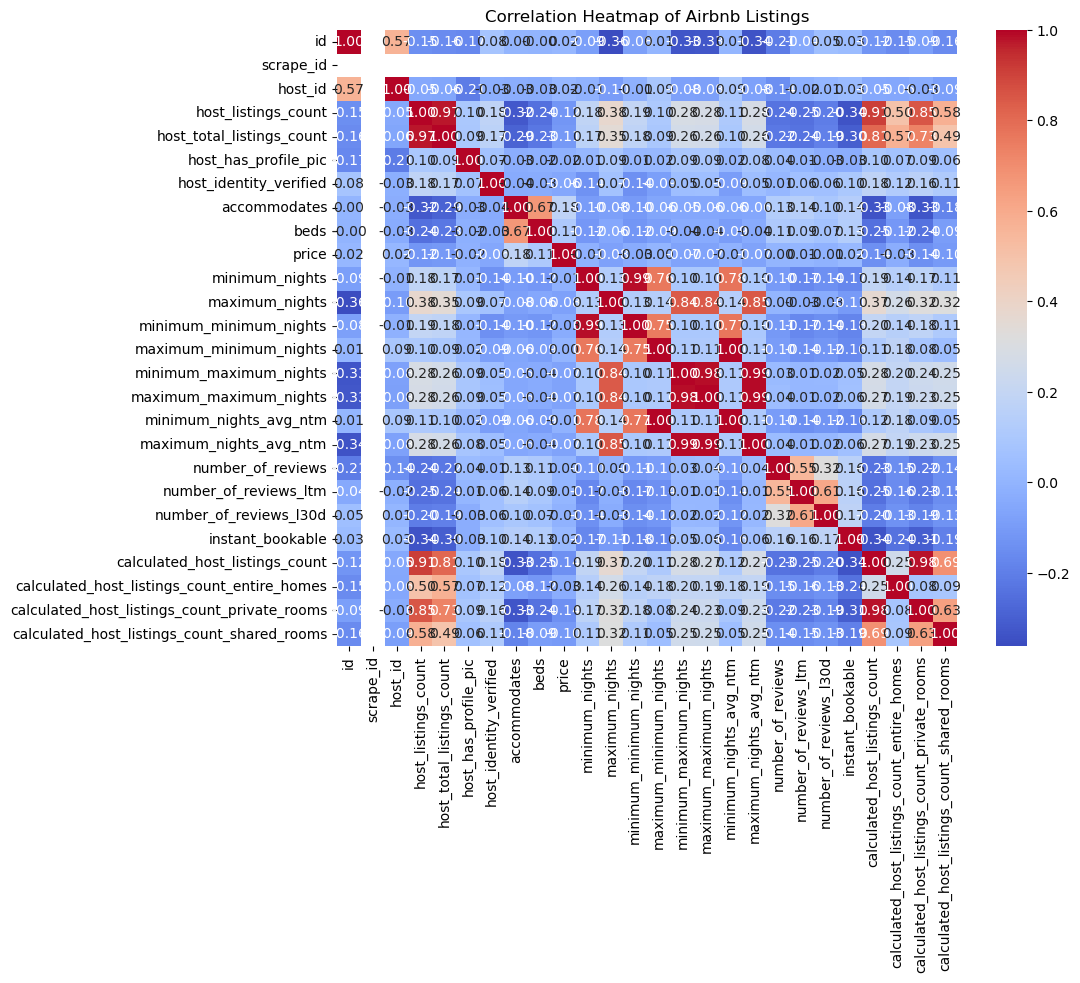

In [46]:
###相关性热力图
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns for correlation calculation
numerical_columns = airbnb_df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the correlation heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title to the plot
plt.title('Correlation Heatmap of Airbnb Listings')

# Display the plot
plt.show()


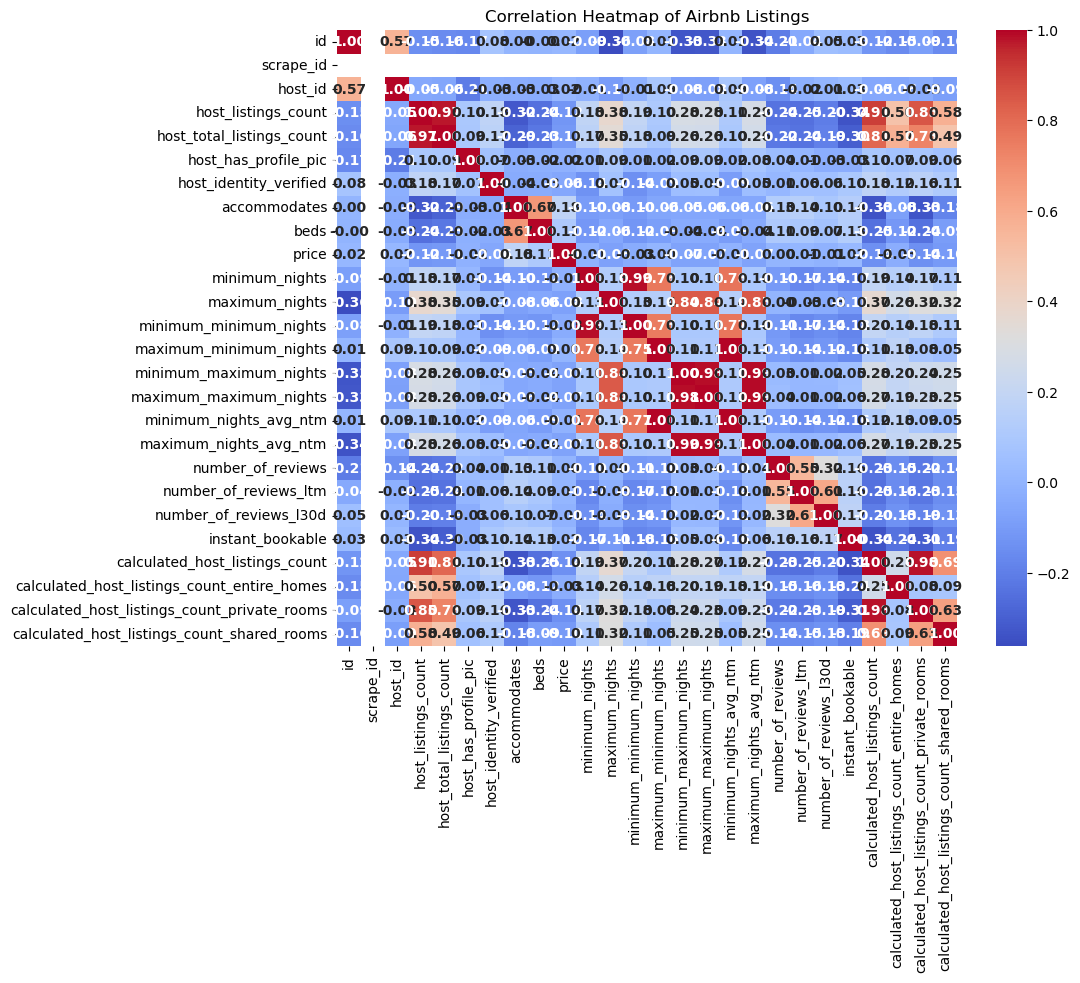

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns for correlation calculation
numerical_columns = airbnb_df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the correlation heatmap using seaborn with adjusted spacing
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10, "weight": "bold"})

# Add title to the plot
plt.title('Correlation Heatmap of Airbnb Listings')

# Display the plot
plt.show()


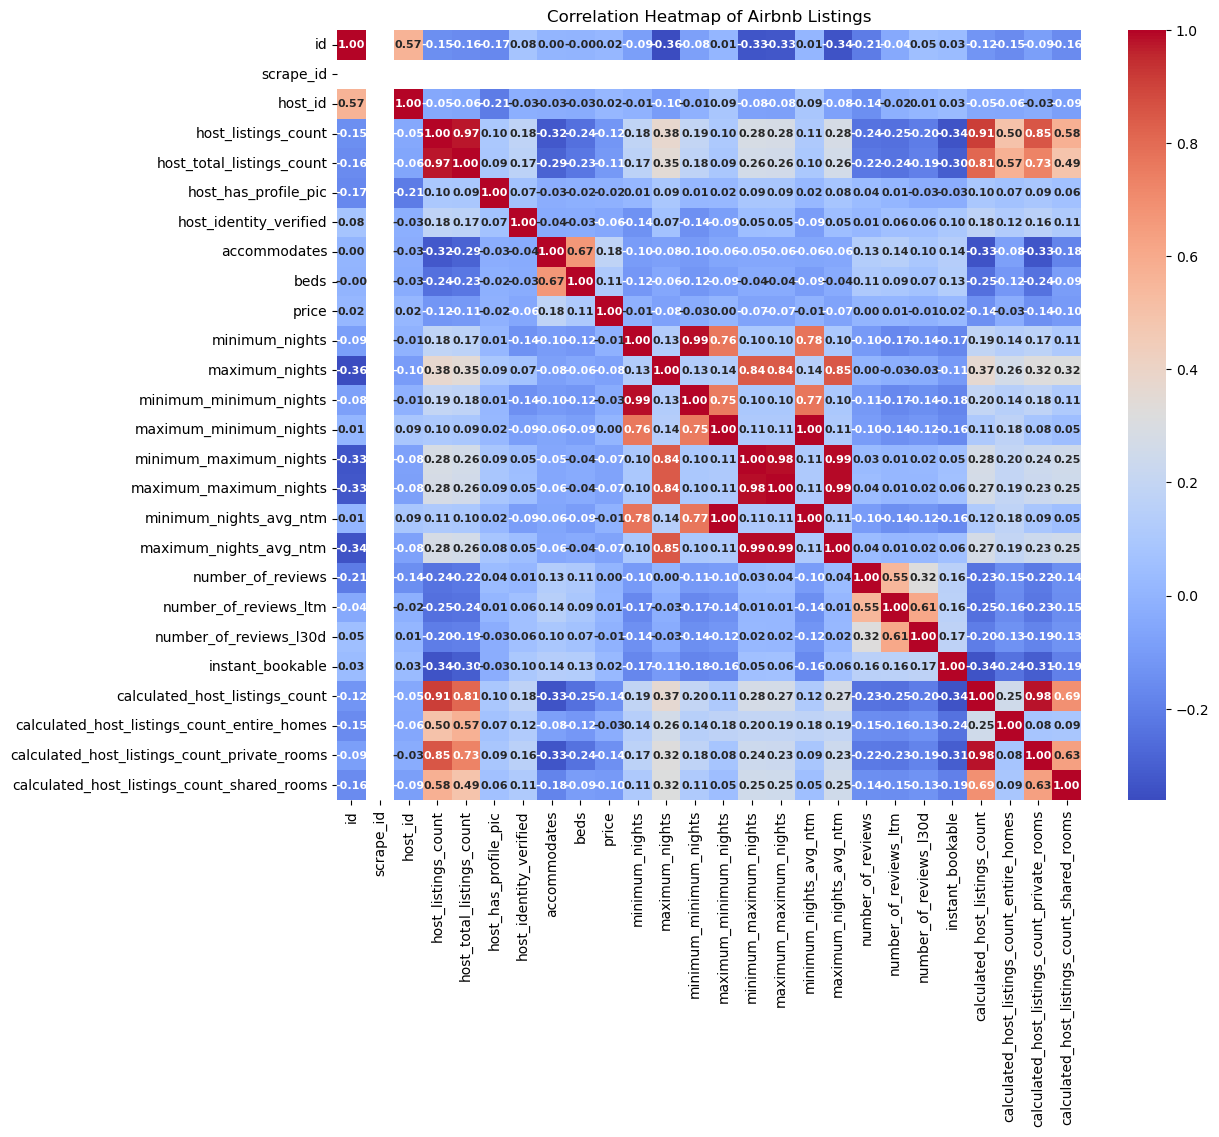

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns for correlation calculation
numerical_columns = airbnb_df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up the matplotlib figure with larger size
plt.figure(figsize=(12, 10))

# Create the correlation heatmap using seaborn with adjusted spacing
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8, "weight": "bold"})

# Add title to the plot
plt.title('Correlation Heatmap of Airbnb Listings')

# Display the plot
plt.show()


In [49]:
# 查看此时的数据集
airbnb_df.head()


,id,scrape_id,last_scraped,source,name,host_id,host_name,host_since,host_response_time,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,price_clusters
0,51351068,20230624004931,2023-06-24,previous scrape,Rental unit in Hong Kong · 2 bedrooms · 2 beds...,125138858,Tony,2017-04-10,within a few hours,Wan Chai,2,2,1,0,Entire rental unit,Entire home/apt,2,1.5 baths,2.00000,470,30,43,30.0,30.0,1125.0,1125.0,30.0,1125.0,1,0,0,0,1,1,0,0,$400 - $500
1,51995972,20230624004931,2023-06-24,previous scrape,Condo in Tung Wan Beach · Studio · 1 bath,109310747,Brenda,2017-01-01,within an hour,Cheung Chau,36,42,1,1,Entire condo,Entire home/apt,2,1 bath,1.60144,430,1,2,1.0,1.0,2.0,2.0,1.0,2.0,2,1,0,0,35,35,0,0,$400 - $500
2,4139784,20230624004931,2023-06-24,city scrape,Home in Sha Tin District · ★4.79 · 1 bedroom ·...,15586744,Sven,2014-05-16,within an hour,Mong Kok,15,17,1,1,Private room in home,Private room,1,1 shared bath,1.00000,500,28,365,28.0,28.0,365.0,365.0,28.0,365.0,15,1,0,0,15,4,11,0,$400 - $500
3,9397325,20230624004931,2023-06-24,city scrape,Rental unit in Hong Kong · ★4.56 · 1 bedroom ·...,48735502,Ocean,2015-11-11,within an hour,Jordan,3,3,1,1,Private room in rental unit,Private room,2,1 bath,1.00000,367,1,1125,1.0,1.0,31.0,1125.0,1.0,635.1,9,6,0,1,3,0,3,0,$300 - $400
4,5159313,20230624004931,2023-06-24,city scrape,Place to stay in 香港 · ★4.64 · 1 bedroom · 10 b...,23376488,Pan,2014-11-05,within a few hours,Mong Kok,8,12,1,1,Shared room,Shared room,10,2 shared baths,10.00000,170,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,58,0,0,0,8,0,0,8,$100 - $200


In [53]:
# 回归数据集
airbnb_regression_df = airbnb_df.copy()




Index(['id', 'scrape_id', 'last_scraped', 'source', 'name', 'host_id',
       'host_name', 'host_since', 'host_response_time', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'price_clusters'],
      dtype='object')


In [58]:
# Assuming you have imported pandas and loaded the DataFrame 'airbnb_regression_df'

# List of columns to be dropped
columns_to_drop = ['id', 'source','host_neighbourhood','scrape_id', 'last_scraped', 'name', 'host_id', 'host_since', 'first_review', 'last_review', 'price_clusters', 'host_name']

# Dropping the columns with 'errors' parameter set to 'ignore'
airbnb_regression_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Printing the remaining columns
print(airbnb_regression_df.columns)




Index(['host_response_time', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')


In [59]:
# 再次查看数据
airbnb_regression_df.head()

,host_response_time,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,within a few hours,2,2,1,0,Entire rental unit,Entire home/apt,2,1.5 baths,2.00000,470,30,43,30.0,30.0,1125.0,1125.0,30.0,1125.0,1,0,0,0,1,1,0,0
1,within an hour,36,42,1,1,Entire condo,Entire home/apt,2,1 bath,1.60144,430,1,2,1.0,1.0,2.0,2.0,1.0,2.0,2,1,0,0,35,35,0,0
2,within an hour,15,17,1,1,Private room in home,Private room,1,1 shared bath,1.00000,500,28,365,28.0,28.0,365.0,365.0,28.0,365.0,15,1,0,0,15,4,11,0
3,within an hour,3,3,1,1,Private room in rental unit,Private room,2,1 bath,1.00000,367,1,1125,1.0,1.0,31.0,1125.0,1.0,635.1,9,6,0,1,3,0,3,0
4,within a few hours,8,12,1,1,Shared room,Shared room,10,2 shared baths,10.00000,170,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,58,0,0,0,8,0,0,8


In [60]:
# 查看原始字段
airbnb_regression_df['bathrooms_text'].value_counts()

1 bath               2843
1 private bath       1336
1 shared bath        1205
2 baths               348
1.5 baths             222
2 shared baths        191
1.5 shared baths       74
3 baths                49
3 shared baths         34
2.5 baths              25
4 shared baths         19
0 baths                18
4 baths                16
Half-bath              15
0 shared baths         14
Shared half-bath       12
Private half-bath      12
5 shared baths          9
3.5 baths               7
5 baths                 6
8 baths                 5
2.5 shared baths        4
10 baths                3
6 shared baths          2
6 baths                 2
3.5 shared baths        2
4.5 shared baths        2
8 shared baths          2
4.5 baths               1
9 baths                 1
6.5 baths               1
5.5 baths               1
Name: bathrooms_text, dtype: int64

In [61]:
# 切分与数据处理
def split_bathroom(df, column, text, new_column):
    df_2 = df[df[column].str.contains(text, case=False)]
    df.loc[df[column].str.contains(text, case=False), new_column] = df_2[column]
    return df
# 应用上述函数
airbnb_regression_df = split_bathroom(airbnb_regression_df, column='bathrooms_text', text='shared', new_column='shared_bath')
airbnb_regression_df = split_bathroom(airbnb_regression_df, column='bathrooms_text', text='private', new_column='private_bath')
# 查看shared_bath字段
airbnb_regression_df['shared_bath'].value_counts()

1 shared bath       1205
2 shared baths       191
1.5 shared baths      74
3 shared baths        34
4 shared baths        19
0 shared baths        14
Shared half-bath      12
5 shared baths         9
2.5 shared baths       4
3.5 shared baths       2
8 shared baths         2
4.5 shared baths       2
6 shared baths         2
Name: shared_bath, dtype: int64

In [62]:
# 查看private_bath字段
airbnb_regression_df['private_bath'].value_counts()

1 private bath       1336
Private half-bath      12
Name: private_bath, dtype: int64

In [78]:
airbnb_regression_df.head()

# 删除'shared_bath'、'private_bath'和'bathrooms_new'这三列
airbnb_regression_df.drop(columns=['bathrooms_new'], inplace=True)

# 打印剩余的列
print(airbnb_regression_df.columns)



Index(['host_response_time', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')


In [87]:
import pandas as pd

# 替换'bathrooms_text'列中的文本
airbnb_regression_df['bathrooms_text'] = airbnb_regression_df['bathrooms_text'].str.replace("private bath", "pb", case=False)
airbnb_regression_df['bathrooms_text'] = airbnb_regression_df['bathrooms_text'].str.replace("private baths", "pbs", case=False)
airbnb_regression_df['bathrooms_text'] = airbnb_regression_df['bathrooms_text'].str.replace("shared bath", "sb", case=False)
airbnb_regression_df['bathrooms_text'] = airbnb_regression_df['bathrooms_text'].str.replace("shared baths", "sb", case=False)
airbnb_regression_df['bathrooms_text'] = airbnb_regression_df['bathrooms_text'].str.replace("shared half-bath", "sb", case=False)
airbnb_regression_df['bathrooms_text'] = airbnb_regression_df['bathrooms_text'].str.replace("private half-bath", "sb", case=False)

# 判断'shared_bath'、'private_bath'和'bathrooms_new'列是否包含相应的字符串并转换为数值类型
airbnb_regression_df['shared_bath'] = airbnb_regression_df['bathrooms_text'].str.contains('sb').astype(int)
airbnb_regression_df['private_bath'] = airbnb_regression_df['bathrooms_text'].str.contains('pb').astype(int)
airbnb_regression_df['bathrooms_new'] = airbnb_regression_df['bathrooms_text'].str.contains('pbs').astype(int)

# 查看处理后的字段
print(airbnb_regression_df[['shared_bath', 'private_bath', 'bathrooms_new']].head())


   shared_bath  private_bath  bathrooms_new
0            0             0              0
1            0             0              0
2            1             0              0
3            0             0              0
4            1             0              0


In [89]:
# 序号编码-下面我们对类别型字段进行编码，根据字段含义的不同，我们使用「序号编码」和「独热向量编码」等方法来完成。
def encoder(df):
    for column in df[['property_type']].columns:
        labels = df[column].astype('category').cat.categories.tolist()
        replace_map = {column : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
        df.replace(replace_map, inplace=True)
        print(replace_map)
    return df 
airbnb_regression_df = encoder(airbnb_regression_df)

{'property_type': {'Boat': 1, 'Camper/RV': 2, 'Campsite': 3, 'Dome': 4, 'Entire bungalow': 5, 'Entire condo': 6, 'Entire cottage': 7, 'Entire guest suite': 8, 'Entire guesthouse': 9, 'Entire home': 10, 'Entire home/apt': 11, 'Entire loft': 12, 'Entire place': 13, 'Entire rental unit': 14, 'Entire serviced apartment': 15, 'Entire townhouse': 16, 'Entire vacation home': 17, 'Entire villa': 18, 'Farm stay': 19, 'Houseboat': 20, 'Hut': 21, 'Pension': 22, 'Private room': 23, 'Private room in bed and breakfast': 24, 'Private room in boat': 25, 'Private room in bungalow': 26, 'Private room in casa particular': 27, 'Private room in condo': 28, 'Private room in cottage': 29, 'Private room in farm stay': 30, 'Private room in guest suite': 31, 'Private room in guesthouse': 32, 'Private room in home': 33, 'Private room in hostel': 34, 'Private room in houseboat': 35, 'Private room in kezhan': 36, 'Private room in loft': 37, 'Private room in minsu': 38, 'Private room in nature lodge': 39, 'Private 

In [90]:
#我们对于host_response_time和room_type字段，使用独热向量编码（哑变量变换）
host_dummy = pd.get_dummies(airbnb_regression_df['host_response_time'], prefix='host_response')
room_dummy = pd.get_dummies(airbnb_regression_df['room_type'], prefix='room_type')
# 拼接编码后的字段
airbnb_regression_df = pd.concat([airbnb_regression_df, host_dummy, room_dummy], axis=1)
# 剔除原始字段
airbnb_regression_df = airbnb_regression_df.drop(columns=['host_response_time', 'room_type'], axis=1)


In [92]:
print(df_3.head())


                                     0
 100\ TV with Chromecast             1
 140\ HDTV                           1
 19\ TV with standard cable          1
 2 Burner stainless steel gas stove  1
 2-5 years old                       4


In [93]:
#我们再把之前处理过的df_amenities做一点处理，再拼接到数据特征里
df_3 = pd.DataFrame(df_amenities.sum())
features = df_3.index[:150].to_list()
amenities_updated = df_amenities.filter(items=features)
airbnb_regression_df = pd.concat([airbnb_regression_df, amenities_updated], axis=1)


In [94]:
airbnb_regression_df.shape
#我们最后得到了186个字段，为了避免特征之间的多重共线性，使用方差因子法（VIF）来选择机器学习模型的特征。 VIF 大于 10 的特征被删除，因为这些特征的方差可以由数据集中的其他特征表示和解释。


(6481, 186)

In [96]:
# 将非数值类型的列转换为虚拟变量
vif_model = pd.get_dummies(airbnb_regression_df.drop(['price'], axis=1))

# 计算VIF
vif_df = pd.DataFrame()
vif_df['feature'] = vif_model.columns
vif_df['VIF'] = [variance_inflation_factor(vif_model.values, i) for i in range(len(vif_model.columns))]

# 选出小于10的特征
vif_df_new = vif_df[vif_df['VIF'] <= 10]
feature_list = vif_df_new['feature'].to_list()

# 选出这些特征对应的数据
model_df = vif_model.filter(items=feature_list)
model_df.head()



/Users/zhuqingting/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/zhuqingting/anaconda3/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,host_has_profile_pic,host_identity_verified,accommodates,beds,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,100\ TV with Chromecast,140\ HDTV,19\ TV with standard cable,2 Burner stainless steel gas stove,2-5 years old,20\ TV,21\ HDTV with standard cable,21\ TV,22\ HDTV,22\ TV,23\ TV with standard cable,24\ HDTV,24\ HDTV with standard cable,24\ TV with standard cable,27\ HDTV with Netflix,29\ TV,30\ HDTV with standard cable,32\ HDTV,32\ HDTV with Amazon Prime Video,32\ HDTV with Apple TV,32\ HDTV with Chromecast,32\ HDTV with Disney+,32\ HDTV with Netflix,32\ HDTV with standard cable,32\ TV,33\ TV with Chromecast,38\ HDTV with Apple TV,4 gas stainless steel stove,40\ HDTV,40\ HDTV with Apple TV,40\ HDTV with Chromecast,40\ HDTV with Netflix,40\ HDTV with standard cable,40\ TV,40\ TV with Disney+,42\ HDTV,42\ HDTV with Apple TV,42\ HDTV with Disney+,42\ HDTV with HBO Max,42\ HDTV with Netflix,42\ HDTV with standard cable,43\ HDTV,43\ HDTV with Amazon Prime Video,43\ HDTV with Apple TV,43\ HDTV with Chromecast,43\ HDTV with Disney+,43\ HDTV with Netflix,43\ HDTV with standard cable,43\ TV with Amazon Prime Video,43\ TV with Netflix,43\ TV with standard cable,44\ HDTV with Amazon Prime Video,44\ HDTV with premium cable,45\ HDTV with Amazon Prime Video,45\ HDTV with Apple TV,45\ HDTV with Netflix,45\ TV with Netflix,46\ HDTV with Netflix,46\ HDTV with premium cable,46\ TV,46\ TV with standard cable,47\ HDTV with Netflix,48\ HDTV with Netflix,48\ TV with Amazon Prime Video,48\ TV with Netflix,49\ HDTV,49\ HDTV with Disney+,49\ HDTV with Netflix,49\ HDTV with standard cable,49\ TV with Amazon Prime Video,5-10 years old,5.1 Surround Sound Bluetooth sound system,50\ HDTV,50\ HDTV with Apple TV,50\ HDTV with Chromecast,50\ HDTV with DVD player,50\ HDTV with Disney+,50\ HDTV with Netflix,50\ HDTV with premium cable,50\ HDTV with standard cable,50\ TV,50\ TV with Chromecast,50\ TV with Netflix,52\ HDTV with Apple TV,52\ HDTV with Netflix,52\ TV,54\ TV with premium cable,54\ TV with standard cable,55\ HDTV,55\ HDTV with Chromecast,55\ HDTV with HBO Max,55\ HDTV with Netflix,55\ HDTV with premium cable,55\ HDTV with standard cable,55\ TV with Disney+,55\ TV with Netflix,56\ HDTV,56\ HDTV with Amazon Prime Video,60\ HDTV with Disney+,62\ HDTV with Netflix,65\ HDTV,65\ HDTV with Amazon Prime Video,65\ HDTV with Chromecast,65\ HDTV with DVD player,65\ HDTV with Disney+,65\ HDTV with Fire TV,65\ HDTV with HBO Max,65\ HDTV with Netflix,65\ TV,70\ HDTV with Disney+,70\ HDTV with standard cable,70\ TV with Disney+,75\ HDTV,75\ HDTV with Amazon Prime Video,77\ HDTV with standard cable,A brand new shampoo and conditioner will be provided for stay with 30 days and more. shampoo,AC - split type ductless system,AEG induction stove,AEG stainless steel induction stove,Aesop body soap,Aesop body soap,Aesop conditioner,Aesop shampoo,Air Fryer oven,Air conditioning,Amazon Prime Video,Apple Bluetooth sound system,Apple Inn shampoo,Apple TV,Aromatica anti-hair loss vegan shampoo shampoo,Asprey etc body soap,Aveda body soap,Aveeno body soap,Avene body soap,B&O Bluetooth sound system,B&O Bluetooth sound system,B&O sound system with Bluetooth and aux,B&O sound system with aux
0,1,0,2,2.00000,43,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,2,1.60144,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1.00000,365,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [97]:
#我们拼接上price目标标签字段，可以构建完整的数据集

price_col = airbnb_regression_df['price']
model_df = model_df.join(price_col)

In [100]:
#OLS建模
def linear_reg(df, test_size=0.3, random_state=42):
    '''
    构建模型并返回评估结果
    输入: 数据dataframe 
    输出: 特征重要度与评估准则（RMSE与R-squared）
    '''
    X = df.drop(columns=['price'])
    y = df[['price']]
    X_columns = X.columns
    # 切分训练集与测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    # 线性回归分类器    
    clf = LinearRegression()
    # 候选参数列表      
    parameters = {
                  'n_jobs': [1, 2, 5, 10, 100],
                  'fit_intercept': [True, False]
                  }
    # 网格搜索交叉验证调参    
    cv = GridSearchCV(estimator=clf, param_grid=parameters, cv=3, verbose=3)  
    cv.fit(X_train,y_train)
    # 测试集预估
    pred = cv.predict(X_test)
    # 模型评估
    r2 = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = mse **.5
    # 最佳参数
    best_par = cv.best_params_
    coefficients = cv.best_estimator_.coef_
    #特征重要度
    importance = np.abs(coefficients)
    feature_importance = pd.DataFrame(importance, columns=X_columns).T
    #feature_importance = feature_importance.T
    feature_importance.columns = ['importance']
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")
    return feature_importance, rmse, r2

linear_feat_importance, linear_rmse, linear_r2 = linear_reg(model_df)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ......fit_intercept=True, n_jobs=1;, score=0.014 total time=   0.0s
[CV 2/3] END ......fit_intercept=True, n_jobs=1;, score=0.092 total time=   0.0s
[CV 3/3] END ......fit_intercept=True, n_jobs=1;, score=0.019 total time=   0.0s
[CV 1/3] END ......fit_intercept=True, n_jobs=2;, score=0.014 total time=   0.0s
[CV 2/3] END ......fit_intercept=True, n_jobs=2;, score=0.092 total time=   0.0s
[CV 3/3] END ......fit_intercept=True, n_jobs=2;, score=0.019 total time=   0.0s
[CV 1/3] END ......fit_intercept=True, n_jobs=5;, score=0.014 total time=   0.0s
[CV 2/3] END ......fit_intercept=True, n_jobs=5;, score=0.092 total time=   0.0s
[CV 3/3] END ......fit_intercept=True, n_jobs=5;, score=0.019 total time=   0.0s
[CV 1/3] END .....fit_intercept=True, n_jobs=10;, score=0.014 total time=   0.0s
[CV 2/3] END .....fit_intercept=True, n_jobs=10;, score=0.092 total time=   0.0s
[CV 3/3] END .....fit_intercept=True, n_jobs=10;

In [101]:
# 随机森林建模
def random_forest(df):
    '''
    构建模型并返回评估结果
    输入: 数据dataframe 
    输出: 特征重要度与评估准则（RMSE与R-squared）
    '''
    X = df.drop(['price'], axis=1)
    X_columns = X.columns
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    # 随机森林模型        
    clf = RandomForestRegressor()
    # 候选参数
    parameters = {
                'n_estimators': [50, 100, 200, 300, 400],
                'max_depth': [2, 3, 4, 5],
                 'max_depth': [80, 90, 100]
                     }
    # 网格搜索交叉验证调参
    cv = GridSearchCV(estimator=clf, param_grid=parameters, cv=5, verbose=3)
    model = cv
    model.fit(X_train, y_train)
    # 测试集预估
    pred = model.predict(X_test)
    # 模型评估
    mse = mean_squared_error(y_test, pred)
    rmse = mse**.5
    r2 = r2_score(y_test, pred)
    # 最佳超参数
    best_par = model.best_params_
    # 特征重要度
    r = permutation_importance(model, X_test, y_test,
                           n_repeats=10,
                           random_state=0)
    perm = pd.DataFrame(columns=['AVG_Importance'], index=[i for i in X_train.columns])
    perm['AVG_Importance'] = r.importances_mean
    perm = perm.sort_values(by='AVG_Importance', ascending=False);
    return rmse, r2, best_par, perm
# 运行建模
r_forest_rmse, r_forest_r2, r_fores_best_params, r_forest_importance = random_forest(model_df)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ....max_depth=80, n_estimators=50;, score=-0.222 total time=   0.3s
[CV 2/5] END ....max_depth=80, n_estimators=50;, score=-1.092 total time=   0.3s
[CV 3/5] END .....max_depth=80, n_estimators=50;, score=0.124 total time=   0.3s
[CV 4/5] END .....max_depth=80, n_estimators=50;, score=0.012 total time=   0.3s
[CV 5/5] END ....max_depth=80, n_estimators=50;, score=-0.035 total time=   0.3s
[CV 1/5] END ...max_depth=80, n_estimators=100;, score=-0.197 total time=   0.6s
[CV 2/5] END ...max_depth=80, n_estimators=100;, score=-1.105 total time=   0.6s
[CV 3/5] END ....max_depth=80, n_estimators=100;, score=0.140 total time=   0.6s
[CV 4/5] END ....max_depth=80, n_estimators=100;, score=0.001 total time=   0.6s
[CV 5/5] END ...max_depth=80, n_estimators=100;, score=-0.111 total time=   0.6s
[CV 1/5] END ...max_depth=80, n_estimators=200;, score=-0.292 total time=   1.1s
[CV 2/5] END ...max_depth=80, n_estimators=200;,

In [102]:
r_forest_rmse, r_forest_r2

(2650.3118133468442, -0.12380114438991541)

In [103]:
#GBDT建模
def GBDT_model(df):
    '''
    构建模型并返回评估结果
    输入: 数据dataframe 
    输出: 特征重要度与评估准则（RMSE与R-squared）
    '''
    X = df.drop(['price'], axis=1)
    Y = df['price']
    X_columns = X.columns
    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
    clf = GradientBoostingRegressor()
    parameters = {
                'learning_rate': [0.1, 0.5, 1],
                'min_samples_leaf': [10, 20, 40 , 60]
                     }
    cv = GridSearchCV(estimator=clf, param_grid=parameters, cv=5, verbose=3)
    model = cv
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    r2 = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = mse**.5
    coefficients = model.best_estimator_.feature_importances_
    importance = np.abs(coefficients)
    feature_importance = pd.DataFrame(importance, index= X_columns,
                                      columns=['importance']).sort_values('importance', ascending=False)[:10]
    return r2, mse, rmse, feature_importance
GBDT_r2, GBDT_mse, GBDT_rmse, GBDT_feature_importance = GBDT_model(model_df)
GBDT_r2, GBDT_rmse
# (0.46352992147034244, 210.58063809645563)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END learning_rate=0.1, min_samples_leaf=10;, score=-0.112 total time=   0.4s
[CV 2/5] END learning_rate=0.1, min_samples_leaf=10;, score=-0.164 total time=   0.3s
[CV 3/5] END learning_rate=0.1, min_samples_leaf=10;, score=-0.034 total time=   0.3s
[CV 4/5] END learning_rate=0.1, min_samples_leaf=10;, score=0.027 total time=   0.3s
[CV 5/5] END learning_rate=0.1, min_samples_leaf=10;, score=-0.000 total time=   0.3s
[CV 1/5] END learning_rate=0.1, min_samples_leaf=20;, score=-0.084 total time=   0.3s
[CV 2/5] END learning_rate=0.1, min_samples_leaf=20;, score=-0.030 total time=   0.3s
[CV 3/5] END learning_rate=0.1, min_samples_leaf=20;, score=0.098 total time=   0.3s
[CV 4/5] END learning_rate=0.1, min_samples_leaf=20;, score=0.027 total time=   0.3s
[CV 5/5] END learning_rate=0.1, min_samples_leaf=20;, score=0.018 total time=   0.3s
[CV 1/5] END learning_rate=0.1, min_samples_leaf=40;, score=-0.031 total time=   0.

(0.0603093558175577, 2423.509289946075)

In [104]:
###归因分析
r_feature_importance = r_forest_importance.reset_index()
r_feature_importance = r_feature_importance.rename(columns={'index':'Feature'})
r_feature_importance[:15]

,Feature,AVG_Importance
0,number_of_reviews,0.242757
1,number_of_reviews_ltm,0.185823
2,beds,0.032041
3,host_identity_verified,0.032004
4,accommodates,0.029431
5,instant_bookable,0.019855
6,number_of_reviews_l30d,0.001882
7,50\ HDTV with Netflix,0.000202
8,5-10 years old,0.000051
9,Aesop shampoo,0.000021


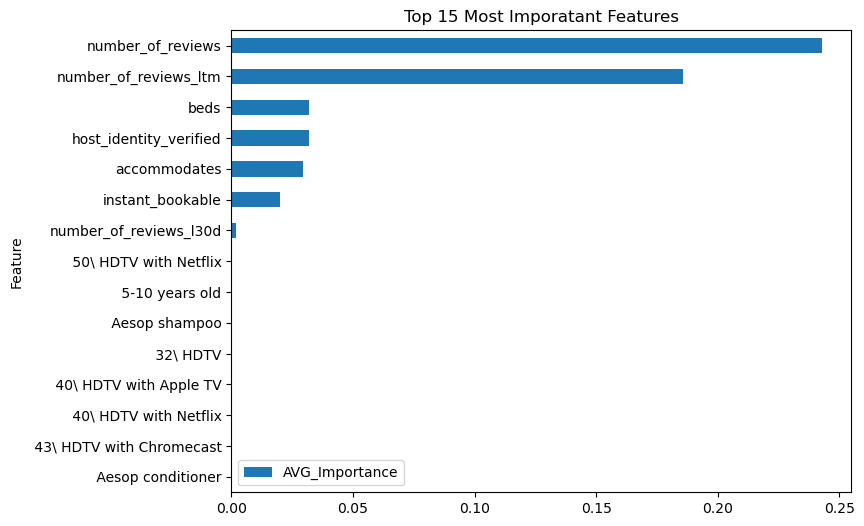

In [105]:
# 绘制最重要的15个因素
r_feature_importance[:15].sort_values(by='AVG_Importance').plot(kind='barh', x='Feature', y='AVG_Importance', figsize=(8,6));
plt.title('Top 15 Most Imporatant Features');